# Homework2 
#### In this assignment, you will learn how to pre-process data, predict values using some simple methods and evaluate the results. 
Version 3 (2017-03-26 pm 03:12)
<br><br>Change Log
<br>-V2-
<br>1. Problem 2. Condition 1. :  "int" type =>  "float" type ("Int" type also allowed)
<br>-V3-
<br>1. Two cells of "Example of calculating mean using Pandas" are changed. Find "#changed" (Boundary redundant problem)
<br>&nbsp; &nbsp; &nbsp; &nbsp; Related to this error, <b>Result Cells for Problem 2. are also changed,</b> and to avoide vague instruction, comments added.
<br>&nbsp; &nbsp; &nbsp; &nbsp; Solve as you want, we will accept both answers(Boundary redundant problem).
<br>2. Problem 1. Hint added. But you don't need to follow hint. As always, it's not mandatory, just a guideline

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import requests
from bs4 import BeautifulSoup

### Fetching data from tsv(tab-separated values)
We will give you GDP per capita in tsv format.<br>(Gross domestic product per capita, current prices in USD; International Monetary Fund, World Economic Outlook Database, October 2016) 
<br>
<br>What you have to do is read data from tsv, put it in pandas dataframe, manipulate data so that it is ready for analyse.

In [2]:
tsv = pd.read_csv('GDPperCapByTab.txt',sep='\t',index_col=0) 
# this will let you read data from file name ~~ , and understand <tab> as delimiter

tsv.head() # You can check whether data is correctly loaded in your df(;tsv) or not

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,1980,1981,1982,1983,1984,1985,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,Estimates Start After
Country,,,,,,,,,,,,,,,,,,,,,
Syria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","1,421.84","1,763.34","1,784.58","1,849.43","1,839.92","1,965.14",...,"2,016.05","2,557.21","2,557.27","2,806.69",n/a,n/a,n/a,n/a,n/a,2010.0
Luxembourg,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","17,831.91","15,332.10","12,580.55","12,349.05","12,096.32","12,514.15",...,"105,825.34","114,522.93","102,359.18","104,459.34","114,791.14","106,730.53","115,101.44","118,208.84","102,716.56",2015.0
Switzerland,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","18,831.59","17,154.56","17,466.37","17,315.59","16,494.31","16,663.63",...,"63,648.21","72,746.41","70,231.93","74,564.36","88,515.92","83,646.06","85,237.42","86,145.33","80,602.69",2015.0
Norway,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...","15,748.33","15,486.75","15,197.90","14,907.06","14,974.23","15,732.94",...,"84,904.37","96,499.70","79,786.85","87,309.30","100,171.70","101,169.35","102,573.67","97,066.57","74,597.99",2015.0
Macao SAR,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",n/a,n/a,n/a,n/a,n/a,n/a,...,"34,083.97","38,086.69","39,615.32","50,920.89","65,870.82","73,932.69","84,854.58","87,272.58","71,394.16",2015.0


## Problem 1. 
1. Drop everything but "name of country" and "data by year".
2. Modify data so that you can change it to float type number. (For example, u'1,421.84' can not be changed to float while "," exists.) 'n/a' can be changed to np.nan.
<br><b>Hint, you can change type of whole data to float in one instuction if your data is in good format. </b>

In [3]:
#TODO
tsv.drop(tsv.columns[[0, 1, 2, 3, 40]], axis=1, inplace=True)


for columnNum in [str(num) for num in range(1980,2016)]:
    tsv[str(columnNum)] = tsv[str(columnNum)].replace({',': ''}, regex=True)
    tsv[str(columnNum)] = tsv[str(columnNum)].replace('n/a',np.NaN)   
    tsv[str(columnNum)] = tsv[str(columnNum)].apply(pd.to_numeric, errors='coerce')
    

In [4]:
print tsv.index[0],tsv.ix[0,0], type(tsv.ix[0,0])

Syria 1421.84 <type 'numpy.float64'>


### Example of calculating mean using Pandas

In [5]:
resulttsv = tsv[[str(num) for num in range(1980,1985)]] #changed

#### In this case 1980-1985 means, 1980,1981,1982,1983,1984. (1985 excluded.)
This is to match data with Infant Mortality Rate data column names

In [6]:
resulttsv['1980-1985']=resulttsv.mean(axis=1)
# I think it would be okay to ignore simple warning below.

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [7]:
resulttsv.head()

,1980,1981,1982,1983,1984,1980-1985
Country,,,,,,
Syria,1421.84,1763.34,1784.58,1849.43,1839.92,1731.822
Luxembourg,17831.91,15332.10,12580.55,12349.05,12096.32,14037.986
Switzerland,18831.59,17154.56,17466.37,17315.59,16494.31,17452.484
Norway,15748.33,15486.75,15197.90,14907.06,14974.23,15262.854
Macao SAR,NaN,NaN,NaN,NaN,NaN,NaN


#### Let's drop something useless

In [8]:
resulttsv=resulttsv.drop([str(num) for num in range(1980,1985)],axis=1) #changed

## Problem 2. Get average value by country of each 5 years from 1980 to 2015
<b> Condition 1 : Data should be in "float" type (numpy.float64 or else) </b>
<br>&nbsp; &nbsp; &nbsp; * "Int" type also allowed. In this case, the result of following cells will be changed (This will not affect grading)
<br><b> Condition 2 : Dataframe should be in the form of given output (two cells below)</b>

<br><b>As we mentioned above, 1980-1985 mean 1980,1981,1982,1983,1984. (1985 excluded.)</b>
<br>This is to match data with Infant Mortality Rate data column names

In [9]:
#TODO
# Think wisely! It does not require long code. 
temp1 = tsv[[str(num) for num in range(1985,1990)]]
resulttsv['1985-1990']=temp1.mean(axis=1)

temp2 = tsv[[str(num) for num in range(1990,1995)]]
resulttsv['1990-1995']=temp2.mean(axis=1)

temp3 = tsv[[str(num) for num in range(1995,2000)]]
resulttsv['1995-2000']=temp3.mean(axis=1)

temp4 = tsv[[str(num) for num in range(2000,2005)]]
resulttsv['2000-2005']=temp4.mean(axis=1)

temp5 = tsv[[str(num) for num in range(2005,2010)]]
resulttsv['2005-2010']=temp5.mean(axis=1)

temp6 = tsv[[str(num) for num in range(2010,2015)]]
resulttsv['2010-2015']=temp6.mean(axis=1)


In [10]:
print resulttsv.index[1],resulttsv.ix[1,0],type(resulttsv.ix[1,0])
resulttsv.head()

Luxembourg 14037.986 <type 'numpy.float64'>


,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015
Country,,,,,,,
Syria,1731.822,1852.6038,995.7332,1094.294,1263.054,2073.390,2806.690
Luxembourg,14037.986,20919.8200,38416.5220,48373.558,58195.980,98488.898,111858.258
Switzerland,17452.484,26454.4740,39355.5180,43602.042,43953.436,63836.030,83621.818
Norway,15262.854,21086.5000,28838.4460,35918.156,45353.460,80352.928,97658.118
Macao SAR,NaN,NaN,NaN,NaN,18365.505,33112.298,72570.312


Let's check the result once again.
<br>Always double-check to avoid mistake

In [11]:
resulttsv.describe()

,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015
count,140.000000,142.000000,171.000000,180.000000,189.000000,189.000000,190.000000
mean,3819.094242,4528.536742,5486.601236,6484.025077,7626.981967,11935.494029,14220.621295
std,5403.238537,6077.691042,8392.242731,9736.584106,11726.745167,17490.596740,20062.784791
min,152.145400,32.696500,107.396667,144.477800,123.361000,181.807200,275.023600
25%,545.765700,541.618200,501.979200,620.251700,700.224400,1076.330200,1682.143500
50%,1447.526000,1629.800000,1406.734000,2041.208000,2237.720000,3893.222000,5728.612000
75%,5097.015500,6241.717500,5948.661000,7012.935500,8198.314000,14475.662000,15562.978500
max,35480.062000,26454.474000,39355.518000,48373.558000,64192.280000,98488.898000,111858.258000


In [12]:
resulttsv.columns

Index([u'1980-1985', u'1985-1990', u'1990-1995', u'1995-2000', u'2000-2005',
       u'2005-2010', u'2010-2015'],
      dtype='object')

# Get Infant Mortality Rate

## Problem 3. Pre-process data.
Do the almost same process as we did above :)

## Problem 3-1.

In [13]:
IMtsv = pd.read_csv('InfantMortalityByTab.txt',sep='\t',index_col=0) #TODO InfantMortalityByTab
IMtsv.head()

,1950-1955,1955-1960,1960-1965,1965-1970,1970-1975,1975-1980,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015
Afghanistan,280.98,256.27,234.26,216.07,198.77,180.32,159.16,134.14,111.31,98.68,89.53,79.51,71.12
Albania,144.92,124.94,98.95,76.97,57.99,46.85,43.20,37.84,30.74,26.30,20.25,16.11,14.42
Algeria,163.06,153.57,142.88,132.35,122.25,105.50,75.37,55.38,47.67,41.92,37.45,34.18,30.28
Angola,230.82,215.04,200.16,186.20,173.03,160.95,157.11,153.18,150.66,138.01,116.05,104.35,96.22
Argentina,63.93,58.80,59.76,57.41,48.12,39.08,32.20,27.13,24.36,21.85,15.04,14.61,13.69


## Problem 3-2.
<b>We need data from 1980-2015</b>
<br><b>Drop data which is not necessary</b>

In [14]:
DroppedIMtsv = IMtsv.drop(IMtsv.columns[[0, 1, 2, 3, 4, 5]], axis=1)

for years in DroppedIMtsv.columns:
    DroppedIMtsv[years] = DroppedIMtsv[years].replace('n/a',np.NaN)
    DroppedIMtsv[years] = DroppedIMtsv[years].apply(pd.to_numeric, errors='coerce')
    
DroppedIMtsv.head()

,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015
Afghanistan,159.16,134.14,111.31,98.68,89.53,79.51,71.12
Albania,43.20,37.84,30.74,26.30,20.25,16.11,14.42
Algeria,75.37,55.38,47.67,41.92,37.45,34.18,30.28
Angola,157.11,153.18,150.66,138.01,116.05,104.35,96.22
Argentina,32.20,27.13,24.36,21.85,15.04,14.61,13.69


In [15]:
print type(DroppedIMtsv.ix[0,0])
DroppedIMtsv.describe()

<type 'numpy.float64'>


,1980-1985,1985-1990,1990-1995,1995-2000,2000-2005,2005-2010,2010-2015
count,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000,175.000000
mean,63.491886,56.118971,51.617486,44.663029,38.529314,32.838629,28.074457
std,45.211616,42.409398,43.941457,36.962890,32.983143,28.707458,25.063410
min,6.400000,4.960000,4.440000,3.640000,2.500000,2.010000,1.580000
25%,22.445000,17.470000,15.950000,11.880000,9.500000,7.750000,6.625000
50%,52.530000,44.020000,40.460000,33.590000,27.000000,22.410000,19.320000
75%,96.535000,86.595000,79.700000,72.175000,61.180000,52.235000,46.480000
max,183.650000,157.780000,288.710000,148.920000,134.930000,116.970000,96.220000


# Draw data as a plot

## Problem 4-1. Define a function to draw catter plot which contained trendline.
#### use .scatter from matplotlib library.
- please print *<b>line equation</b>* and *<b>MSE(mean squared error)</b>* for each plots
- matplotlib.pyplot.scatter: http://matplotlib.org/api/pyplot_api.html?highlight=scatter#matplotlib.pyplot.scatter
- you can find example of trendline on matplotlib very easily.

y=0.110457x+(449.446644)
MeanSquaredError:  80154.3971289


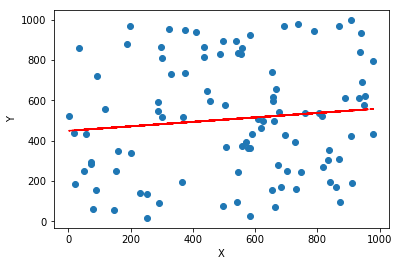

In [16]:
def plot_2D_trendline(x_data, y_data, pred=None, x_label='X', y_label='Y', title=None):
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.scatter(x_data, y_data)
    

    if pred is not None:
        plt.plot(x_data, pred, color='red', linewidth=2)
    if title is not None:
        plt.title(title)
    
    # the line equation:

    #TODO
    z = np.polyfit(x_data, y_data, 1)
    p = np.poly1d(z)
    plt.plot(x_data, p(x_data),"r--")
    print "y=%.6fx+(%.6f)"%(z[0],z[1])
    
    #print Mean Squared Error
    mse = np.mean((p(x_data) - y_data) ** 2)
    print "MeanSquaredError: ",mse
    
    plt.show()

# Let's see if the function works.
plot_2D_trendline(np.random.randint(1000,size=100),np.random.randint(1000,size=100))    


## Problem 4-2. Draw scatter plot and trendline by using infant mortality rate and GDP per capita
- x-axis: *GDP per cap*, y-axis: *infant mortality*
- one plot per 5-year period (total 7 plots)
- The trend line may seem somewhat meaningless, but it isn't problem now.

y=-0.004467x+(79.795520)
MeanSquaredError:  1295.08362133


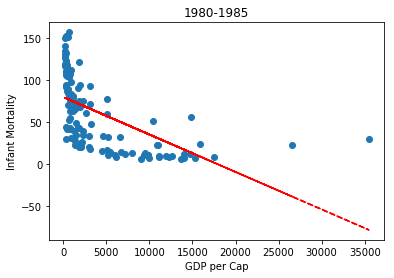

y=-0.004280x+(75.134272)
MeanSquaredError:  1038.2871104


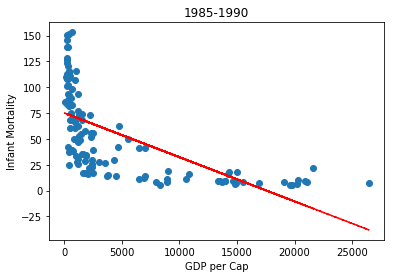

y=-0.002717x+(66.470747)
MeanSquaredError:  1348.3474651


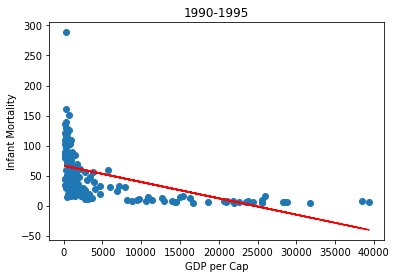

y=-0.002061x+(56.933848)
MeanSquaredError:  883.535277015


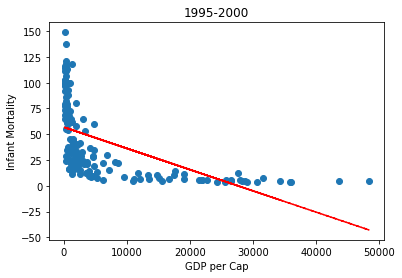

y=-0.001587x+(49.877590)
MeanSquaredError:  742.029427374


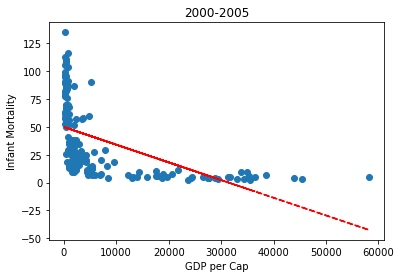

y=-0.000886x+(42.974818)
MeanSquaredError:  569.271857088


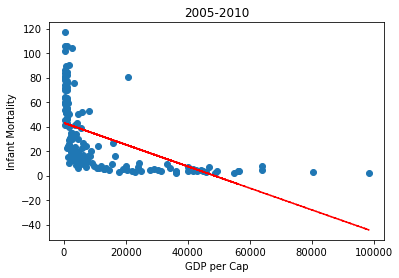

y=-0.000666x+(37.537413)
MeanSquaredError:  449.286688019


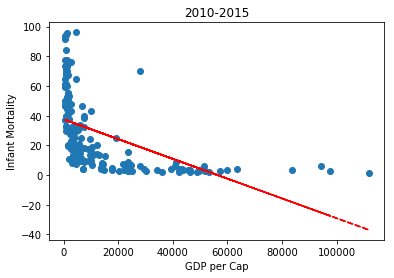

In [17]:
for years in DroppedIMtsv.columns:
    xData=[]
    yData=[]

    #TODO
#     result = pd.concat([DroppedIMtsv, resulttsv], axis=1, join='inner')
#     result[years].head()
    
    for rowName in DroppedIMtsv.index:
        if rowName in resulttsv.index:
            if not np.isnan(DroppedIMtsv.get_value(rowName, years)):
                if not np.isnan(resulttsv.get_value(rowName, years)):
                    xData.append(resulttsv.get_value(rowName, years))
                    yData.append(DroppedIMtsv.get_value(rowName, years))
                    
    xData = np.array(xData)
    yData = np.array(yData)
    plot_2D_trendline(xData, yData, x_label='GDP per Cap', y_label='Infant Mortality', title=years)


## Problem 4-3. Let's make trend line meaningful.
- As mentioned, the trend line is somewhat meaningless.
- By applying a *<b>logarithmic scale</b>* on the data, you can make trendlines more meaningful.
<br/>    ** hint: Most of mathmetical functions in python can be found in numpy.*

y=-0.558583x+(3.437674)
MeanSquaredError:  0.0537986431779


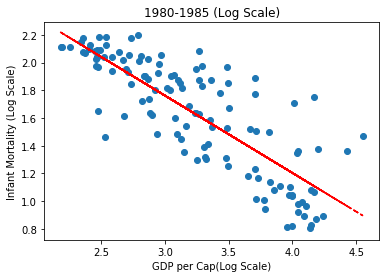

y=-0.582474x+(3.460723)
MeanSquaredError:  0.0408939723817


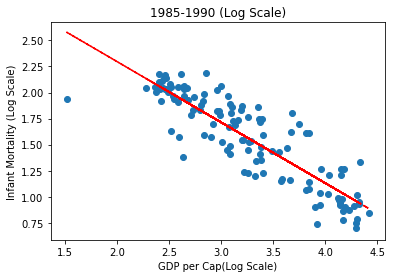

y=-0.543781x+(3.282149)
MeanSquaredError:  0.0520151176885


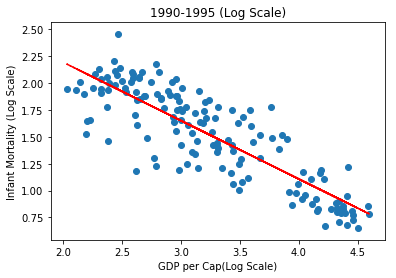

y=-0.603418x+(3.444541)
MeanSquaredError:  0.0420481553372


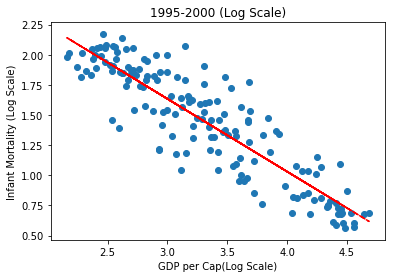

y=-0.598712x+(3.380214)
MeanSquaredError:  0.0463010709825


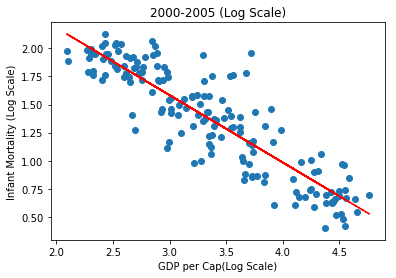

y=-0.611121x+(3.490182)
MeanSquaredError:  0.0512542257394


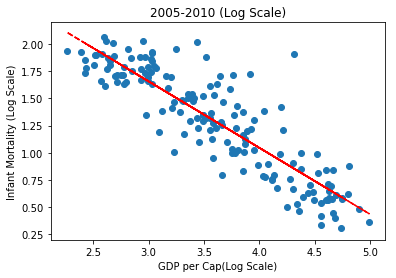

y=-0.647810x+(3.635166)
MeanSquaredError:  0.061745874625


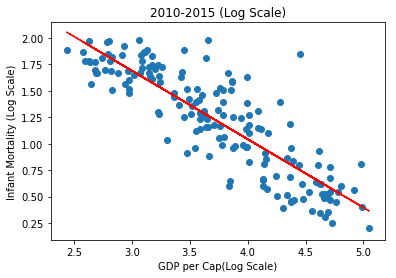

In [18]:
for years in DroppedIMtsv.columns:
    xDataLog=[]
    yDataLog=[]
    
    #TODO
    for rowName in DroppedIMtsv.index:
        if rowName in resulttsv.index:
            if not np.isnan(DroppedIMtsv.get_value(rowName, years)):
                if not np.isnan(resulttsv.get_value(rowName, years)):
                    xDataLog.append(resulttsv.get_value(rowName, years))
                    yDataLog.append(DroppedIMtsv.get_value(rowName, years))
                    
                    
    xDataLog = np.log10(xDataLog)
    yDataLog = np.log10(yDataLog)
    plot_2D_trendline(xDataLog, yDataLog, x_label='GDP per Cap(Log Scale)', y_label='Infant Mortality (Log Scale)', title=years+" (Log Scale)")
    

# Scikit-Learn
* Scikit-learn is the most common python library in machine learning.
* Let's port our work from matplotlib to scikit-learn.
* However, not all plots will be handled. We will focus on the most recent data, 2010-2015.

<b>URL:</b> http://scikit-learn.org/
<br/><b>Install guide:</b> http://scikit-learn.org/stable/install.html

## Problem 5. Import scikit-learn
- If the installation of the library is complete, this code will run without any problems.

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Problem 5-1. Applying the linear regression model of scikit-learn to our data
- Information about the various model api is available at the following url:<br/>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;http://scikit-learn.org/stable/modules/classes.html
- *Apply regression model for 2010-2015 data only.*
- Please print MSE of implemented model.

In [20]:
lr = LinearRegression()

years = DroppedIMtsv.columns[-1]
xData=[]
yData=[]

#TODO
for rowName in DroppedIMtsv.index:
        if rowName in resulttsv.index:
            if not np.isnan(DroppedIMtsv.get_value(rowName, years)):
                if not np.isnan(resulttsv.get_value(rowName, years)):
                    xData.append(resulttsv.get_value(rowName, years))
                    yData.append(DroppedIMtsv.get_value(rowName, years))
                    
xData = np.array(xData)
yData = np.array(yData)

xData = [
    [val] for val in xData
]
yData = [
    [val] for val in yData
]

lr.fit(xData, yData)
print "MSE - scikit learn linear regression: ", mean_squared_error(lr.predict(xData), yData)

MSE - scikit learn linear regression:  449.286688019


## Problem 5-2. Expanded to polynomial regression
- Let's look at the performance change by changing the degree in 0-9.
- Normalization should also be followed.

*hint: You can use an additional API to implement the polynomial regression model.*

In [21]:
#TODO: import api(s) to implement the polynomial regression model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

for deg in range(10):
    PolynomialRegression = make_pipeline(PolynomialFeatures(deg), LinearRegression())

    plr = PolynomialRegression.fit(xData, yData)
    print "MSE - poly-linear regression; degree=", deg,": ", mean_squared_error(plr.predict(xData), yData)

MSE - poly-linear regression; degree= 0 :  632.561941032
MSE - poly-linear regression; degree= 1 :  449.286688019
MSE - poly-linear regression; degree= 2 :  364.032958026
MSE - poly-linear regression; degree= 3 :  302.116977901
MSE - poly-linear regression; degree= 4 :  430.843072385
MSE - poly-linear regression; degree= 5 :  490.378180982
MSE - poly-linear regression; degree= 6 :  519.214030855
MSE - poly-linear regression; degree= 7 :  539.789402831
MSE - poly-linear regression; degree= 8 :  558.857032159
MSE - poly-linear regression; degree= 9 :  577.147404813


## Problem 5-3. The change in performance according to the degree can be confirmed. Is performance improvement reliable? Describe the problem of current method.

## Problem 5-4. To solve the problem mentioned above, you must divide the train set and the test set. Try experimenting by assigning 20% of the total sample to a test set.
- Please print MSEs of implemented model, for both of training and test set.
- Degree is the same as the previous experiment, 0-9.

*hint: Implementing it yourself can be a good experience, but using scikit-learn would make it easy to solve this problem.*

In [22]:
#TODO: import API for deviding training and test set
from sklearn.cross_validation import train_test_split

x_train, x_val, y_train, y_val = train_test_split(xData, yData, test_size=0.2)

for deg in range(10):
    PolynomialRegression = make_pipeline(PolynomialFeatures(deg), LinearRegression())

    plr = PolynomialRegression.fit(x_train, y_train)
    print "MSE - sklearn poly-linear regression; degree=", deg,"\n\ttrain: ", mean_squared_error(plr.predict(x_train), y_train), ",\tval: ", mean_squared_error(plr.predict(x_val), y_val)


MSE - sklearn poly-linear regression; degree= 0 
	train:  643.028004683 ,	val:  591.667820937
MSE - sklearn poly-linear regression; degree= 1 
	train:  438.650843614 ,	val:  499.895187737
MSE - sklearn poly-linear regression; degree= 2 
	train:  337.0643101 ,	val:  515.852355032
MSE - sklearn poly-linear regression; degree= 3 
	train:  264.389329706 ,	val:  559.743481635
MSE - sklearn poly-linear regression; degree= 4 
	train:  396.684066239 ,	val:  1395.82709051
MSE - sklearn poly-linear regression; degree= 5 
	train:  475.736233238 ,	val:  2050.70084282
MSE - sklearn poly-linear regression; degree= 6 
	train:  512.823325803 ,	val:  2971.75686201
MSE - sklearn poly-linear regression; degree= 7 
	train:  534.366323139 ,	val:  5947.42942722
MSE - sklearn poly-linear regression; degree= 8 
	train:  550.406381212 ,	val:  15082.9273559
MSE - sklearn poly-linear regression; degree= 9 
	train:  564.663953407 ,	val:  39906.169364


//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Problem 6. We currently use only one feature called GDP per capita. If you want to improve performance, you will need to add features. Present other valid features and describe why you think so.
- You only need to collect the URL. You do not need to collect data or conduct further experiments.

http://www.index.go.kr/potal/main/EachDtlPageDetail.do?idx_cd=2769